In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
train = pd.read_csv('ua.base', sep="\t", header=None)
train.columns = ['user_id', 'item_id', 'rating', 'timestamp']
train = train.drop(['timestamp'], axis=1)
train.user_id = train.user_id - 1
train.item_id = train.item_id - 1


test = pd.read_csv('ua.test', sep="\t", header=None)
test.columns = ['user_id', 'item_id', 'rating', 'timestamp']
test = test.drop(['timestamp'], axis=1)
test.user_id = test.user_id - 1
test.item_id = test.item_id - 1

In [3]:
class SVDModel:
    def __init__(self, lr=0.1, reg=0.5, n_components=10, n_epochs=1, random_state=42):
        self.lr = lr
        self.reg = reg
        self.n_components = n_components
        self.n_epochs = n_epochs
        self.rng = np.random.RandomState(random_state)
        
        
    def fit(self, train):
        self.global_mean = train.rating.mean()
        self.u_count = train.user_id.max() + 1
        self.i_count = train.item_id.max() + 1
        self.u_factors = self.rng.normal(0, 0.1, (self.u_count, self.n_components))
        self.i_factors = self.rng.normal(0, 0.1, (self.i_count, self.n_components))
        self.u_bias = np.zeros(shape=(self.u_count,))
        self.i_bias = np.zeros(shape=(self.i_count,))
        self.trainset = train.to_numpy()
        
        for _ in tqdm(range(self.n_epochs)): 
            for u, i, r in self.trainset:
                pred = self.estimate(u, i)
                e = r - pred
                self.u_bias[u] = self.u_bias[u] + self.lr * (e - self.reg * self.u_bias[u])
                self.i_bias[i] = self.i_bias[i] + self.lr * (e - self.reg * self.i_bias[i])
                self.u_factors[u] = self.u_factors[u] + self.lr * (e * self.i_factors[i] - self.reg * self.u_factors[u])
                self.i_factors[i] = self.i_factors[i] + self.lr * (e * self.u_factors[u] - self.reg * self.i_factors[i])
        #return self.rmse(train['rating'], self.predict(train['user_id'], train['item_id']))
        
        
    def estimate(self, user_id, item_id):
        est = self.global_mean + self.u_bias[user_id] + self.i_bias[item_id]
        est += sum(self.u_factors[user_id] * self.i_factors[item_id])
        return est

    def predict(self, user_ids, item_ids):
        pred = []
        for u, i in zip(user_ids, item_ids):
            pred.append(self.estimate(u, i))
        return pred   
    
    def rmse(self, y_true, y_pred):
        return np.sqrt(((y_pred - y_true) **2).mean())

In [7]:
lrs = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.000003, 0.00003, 0.0003, 0.003, 0.03, 0.03, 0.000005, 0.00005, 0.0005, 0.005, 0.05, 0.5, 0.000007, 0.00007, 0.0007, 0.007, 0.07, 0.7, 0.0002, 0.00004, 0.0003, 0.0006, 0.000002, 0.0008, 0.09]
regs = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.000003, 0.00003, 0.0003, 0.003, 0.03, 0.03, 0.000005, 0.00005, 0.0005, 0.005, 0.05, 0.5, 0.000007, 0.00007, 0.0007, 0.007, 0.07, 0.7, 0.0002, 0.00004, 0.0003, 0.0006, 0.000002, 0.0008, 0.09]

In [8]:
results = pd.DataFrame()
for lr in lrs:
    for reg in regs:
        m = SVDModel(lr=lr, reg=reg)
        m.fit(train)
        y_pred = m.predict(test.user_id, test.item_id)
        m.rmse(test.rating, y_pred)
        results = results.append(
        
        {
            'lr' : lr,
            'reg' : reg,
            'result' : m.rmse(test.rating, y_pred)
            
            
        }, ignore_index=True
        
        
        )
        print(lr, reg)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-06 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1e-05 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0001 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.09


<ipython-input-3-50e9c804d3f1>:27: RuntimeWarning: overflow encountered in multiply
  self.i_factors[i] = self.i_factors[i] + self.lr * (e * self.u_factors[u] - self.reg * self.i_factors[i])
<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: overflow encountered in multiply
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])
<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: invalid value encountered in double_scalars
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])
<ipython-input-3-50e9c804d3f1>:26: RuntimeWarning: overflow encountered in multiply
  self.u_factors[u] = self.u_factors[u] + self.lr * (e * self.i_factors[i] - self.reg * self.u_factors[u])
<ipython-input-3-50e9c804d3f1>:27: RuntimeWarning: invalid value encountered in subtract
  self.i_factors[i] = self.i_factors[i] + self.lr * (e * self.u_factors[u] - self.reg * self.i_factors[i])
<ipython-input-3-50e9c804d3f1>:26: RuntimeWarning: invalid value encountered in add
  self.u_factors[u] = self.u_fa

0.1 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0001


<ipython-input-3-50e9c804d3f1>:24: RuntimeWarning: invalid value encountered in double_scalars
  self.u_bias[u] = self.u_bias[u] + self.lr * (e - self.reg * self.u_bias[u])
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.001


<ipython-input-3-50e9c804d3f1>:25: RuntimeWarning: invalid value encountered in double_scalars
  self.i_bias[i] = self.i_bias[i] + self.lr * (e - self.reg * self.i_bias[i])
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0005 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: overflow encountered in double_scalars
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])


0.5 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0007 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]<ipython-input-3-50e9c804d3f1>:32: RuntimeWarning: invalid value encountered in double_scalars
  est = self.global_mean + self.u_bias[user_id] + self.i_bias[item_id]


0.07 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0006 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.09


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 1e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 1e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.001


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.5


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0008


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.52s/it]

0.09 0.09


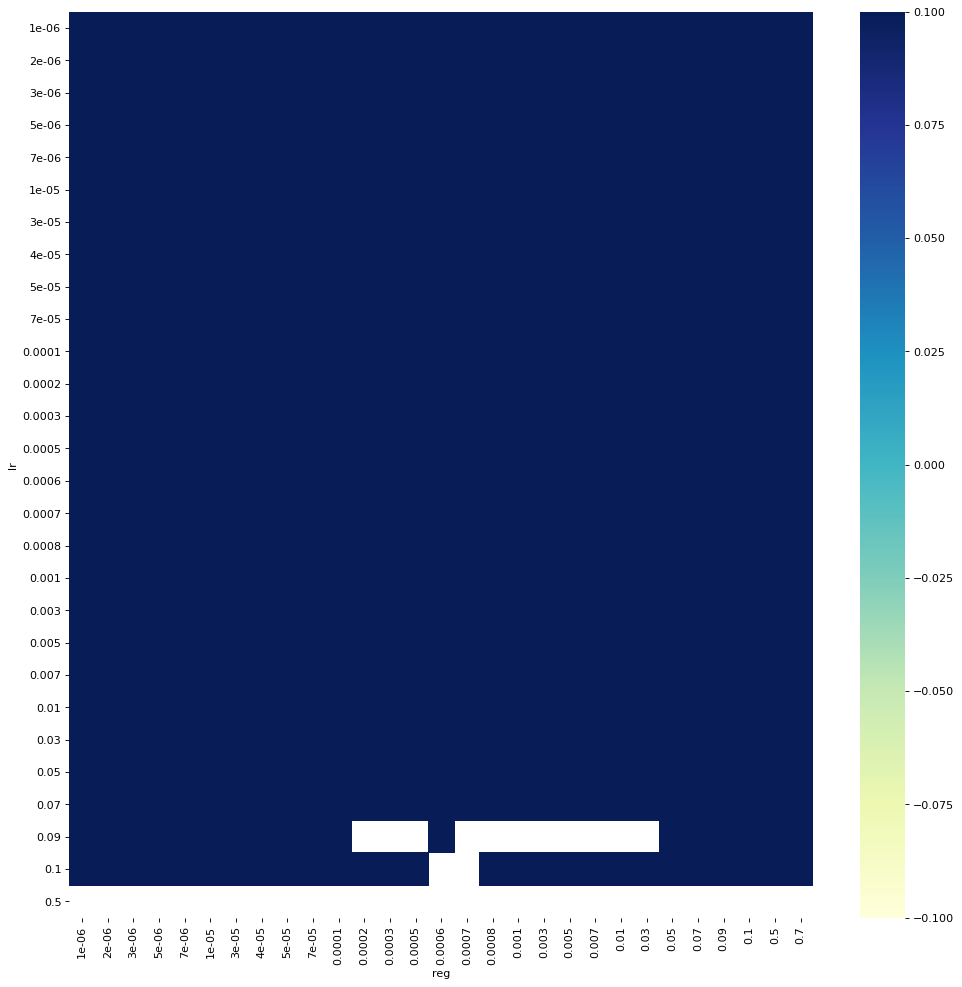

In [25]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
heatmap1_data = pd.pivot_table(results, values='result', 
                     index=['lr'], 
                     columns='reg')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [35]:
lrs = [0.001, 0.01, 0.1, 0.000003, 0.00003, 0.0003, 0.003, 0.03, 0.03, 0.000005, 0.00005, 0.005, 0.05, 0.5, 0.000007, 0.00007, 0.007, 0.07, 0.7, 0.0002, 0.00004, 0.0003, 0.000002, 0.0008, 0.09]
regs = [0.01, 0.1, 0.000003, 0.00003, 0.0003, 0.003, 0.03, 0.03, 0.000005, 0.00005, 0.0005, 0.005, 0.05, 0.000007, 0.00007, 0.0007, 0.007, 0.07, 0.7, 0.0002, 0.00004, 0.0003, 0.0006, 0.000002, 0.0008]

In [36]:
results = pd.DataFrame()
for lr in lrs:
    for reg in regs:
        m = SVDModel(lr=lr, reg=reg)
        m.fit(train)
        y_pred = m.predict(test.user_id, test.item_id)
        m.rmse(test.rating, y_pred)
        results = results.append(
        
        {
            'lr' : lr,
            'reg' : reg,
            'result' : m.rmse(test.rating, y_pred)
            
            
        }, ignore_index=True
        
        
        )
        print(lr, reg)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0008


<ipython-input-3-50e9c804d3f1>:27: RuntimeWarning: overflow encountered in multiply
  self.i_factors[i] = self.i_factors[i] + self.lr * (e * self.u_factors[u] - self.reg * self.i_factors[i])
<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: overflow encountered in multiply
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])
<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: invalid value encountered in double_scalars
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])
<ipython-input-3-50e9c804d3f1>:27: RuntimeWarning: invalid value encountered in subtract
  self.i_factors[i] = self.i_factors[i] + self.lr * (e * self.u_factors[u] - self.reg * self.i_factors[i])
<ipython-input-3-50e9c804d3f1>:26: RuntimeWarning: overflow encountered in multiply
  self.u_factors[u] = self.u_factors[u] + self.lr * (e * self.i_factors[i] - self.reg * self.u_factors[u])
<ipython-input-3-50e9c804d3f1>:26: RuntimeWarning: invalid value encountered in add
  self.u_factors[u] = self.u_fa

0.1 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-06 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

3e-05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-06 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: overflow encountered in double_scalars
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])


0.5 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-06 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]<ipython-input-3-50e9c804d3f1>:32: RuntimeWarning: invalid value encountered in double_scalars
  est = self.global_mean + self.u_bias[user_id] + self.i_bias[item_id]


0.7 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2e-06 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 2e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 3e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 5e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 7e-06


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 2e-06


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.86s/it]

0.09 0.0008


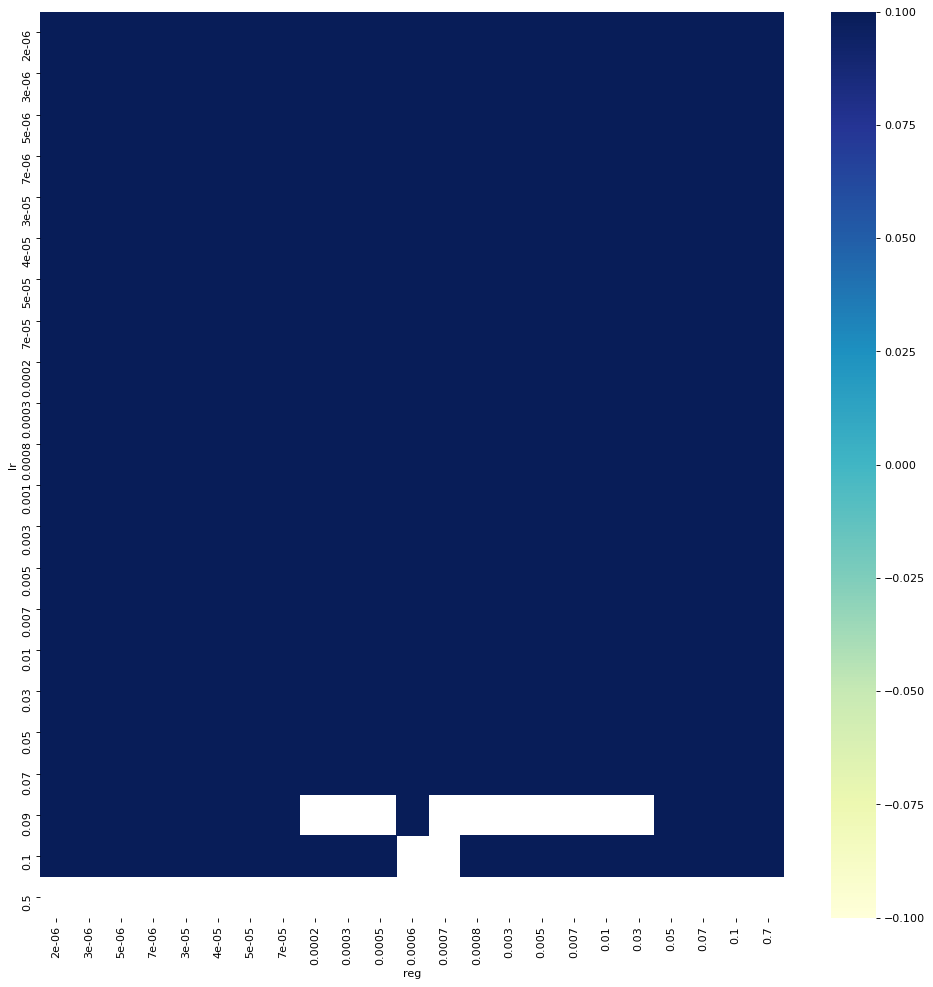

In [37]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
heatmap1_data = pd.pivot_table(results, values='result', 
                     index=['lr'], 
                     columns='reg')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [38]:
lrs = [0.001, 0.01, 0.1, 0.0003, 0.003, 0.03, 0.03, 0.00005, 0.005, 0.05, 0.5, 0.00007, 0.007, 0.07, 0.7, 0.0002, 0.00004, 0.0003, 0.0008, 0.09]
regs = [0.01, 0.1, 0.00003, 0.0003, 0.003, 0.03, 0.03, 0.00005, 0.0005, 0.005, 0.05, 0.00007, 0.0007, 0.007, 0.07, 0.7, 0.0002, 0.00004, 0.0003, 0.0006, 0.0008]

In [39]:
results = pd.DataFrame()
for lr in lrs:
    for reg in regs:
        m = SVDModel(lr=lr, reg=reg)
        m.fit(train)
        y_pred = m.predict(test.user_id, test.item_id)
        m.rmse(test.rating, y_pred)
        results = results.append(
        
        {
            'lr' : lr,
            'reg' : reg,
            'result' : m.rmse(test.rating, y_pred)
            
            
        }, ignore_index=True
        
        
        )
        print(lr, reg)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0008


<ipython-input-3-50e9c804d3f1>:27: RuntimeWarning: overflow encountered in multiply
  self.i_factors[i] = self.i_factors[i] + self.lr * (e * self.u_factors[u] - self.reg * self.i_factors[i])
<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: overflow encountered in multiply
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])
<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: invalid value encountered in double_scalars
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])
<ipython-input-3-50e9c804d3f1>:27: RuntimeWarning: invalid value encountered in subtract
  self.i_factors[i] = self.i_factors[i] + self.lr * (e * self.u_factors[u] - self.reg * self.i_factors[i])
<ipython-input-3-50e9c804d3f1>:26: RuntimeWarning: overflow encountered in multiply
  self.u_factors[u] = self.u_factors[u] + self.lr * (e * self.i_factors[i] - self.reg * self.u_factors[u])
<ipython-input-3-50e9c804d3f1>:26: RuntimeWarning: invalid value encountered in add
  self.u_factors[u] = self.u_fa

0.1 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

5e-05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: overflow encountered in double_scalars
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])


0.5 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

7e-05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]<ipython-input-3-50e9c804d3f1>:32: RuntimeWarning: invalid value encountered in double_scalars
  est = self.global_mean + self.u_bias[user_id] + self.i_bias[item_id]


0.7 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0002 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

4e-05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0008 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.1


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 3e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 5e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.7


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 4e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0006


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.88s/it]

0.09 0.0008


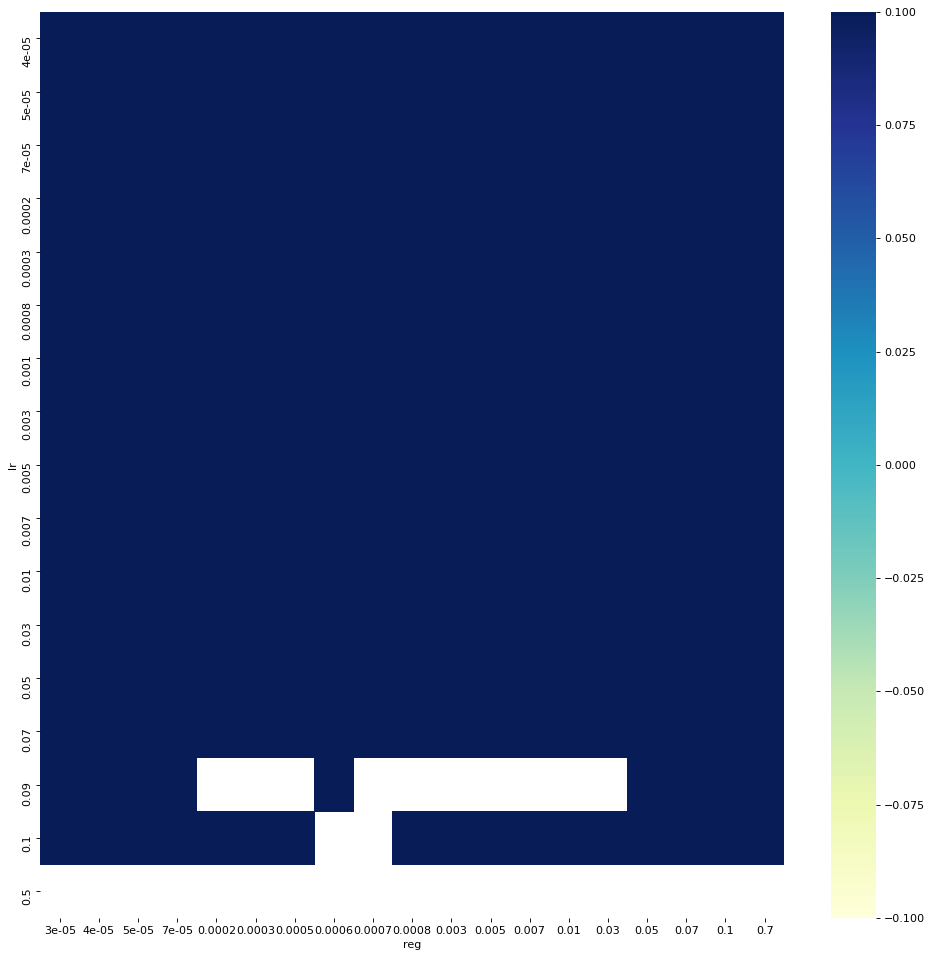

In [40]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
heatmap1_data = pd.pivot_table(results, values='result', 
                     index=['lr'], 
                     columns='reg')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [41]:
lrs = [0.001, 0.01, 0.1, 0.0003, 0.003, 0.03, 0.03, 0.005, 0.05, 0.5, 0.007, 0.07, 0.7, 0.09]
regs = [0.01, 0.0003, 0.003, 0.03, 0.03, 0.0005, 0.005, 0.05, 0.00007, 0.0007, 0.007, 0.07,  0.0002, 0.0003, 0.0006, 0.0008]

In [42]:
results = pd.DataFrame()
for lr in lrs:
    for reg in regs:
        m = SVDModel(lr=lr, reg=reg)
        m.fit(train)
        y_pred = m.predict(test.user_id, test.item_id)
        m.rmse(test.rating, y_pred)
        results = results.append(
        
        {
            'lr' : lr,
            'reg' : reg,
            'result' : m.rmse(test.rating, y_pred)
            
            
        }, ignore_index=True
        
        
        )
        print(lr, reg)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.001 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.01 0.0008


<ipython-input-3-50e9c804d3f1>:27: RuntimeWarning: overflow encountered in multiply
  self.i_factors[i] = self.i_factors[i] + self.lr * (e * self.u_factors[u] - self.reg * self.i_factors[i])
<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: overflow encountered in multiply
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])
<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: invalid value encountered in double_scalars
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])
<ipython-input-3-50e9c804d3f1>:27: RuntimeWarning: invalid value encountered in subtract
  self.i_factors[i] = self.i_factors[i] + self.lr * (e * self.u_factors[u] - self.reg * self.i_factors[i])
<ipython-input-3-50e9c804d3f1>:26: RuntimeWarning: overflow encountered in multiply
  self.u_factors[u] = self.u_factors[u] + self.lr * (e * self.i_factors[i] - self.reg * self.u_factors[u])
<ipython-input-3-50e9c804d3f1>:26: RuntimeWarning: invalid value encountered in add
  self.u_factors[u] = self.u_fa

0.1 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.1 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0007


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.08s/it]

0.005 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0002


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.08s/it]

0.005 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0006


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.07s/it]

0.005 0.0008


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.12s/it]

0.05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.03


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.05s/it]

0.5 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: overflow encountered in double_scalars
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])


0.5 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.03


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.07s/it]

0.007 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.005


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.11s/it]

0.007 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.07 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]<ipython-input-3-50e9c804d3f1>:32: RuntimeWarning: invalid value encountered in double_scalars
  est = self.global_mean + self.u_bias[user_id] + self.i_bias[item_id]


0.7 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.003


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.03s/it]

0.7 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.007


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.07s/it]

0.7 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0006


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.7 0.0008


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 7e-05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.07


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.17s/it]

0.09 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.09 0.0006


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.07s/it]

0.09 0.0008


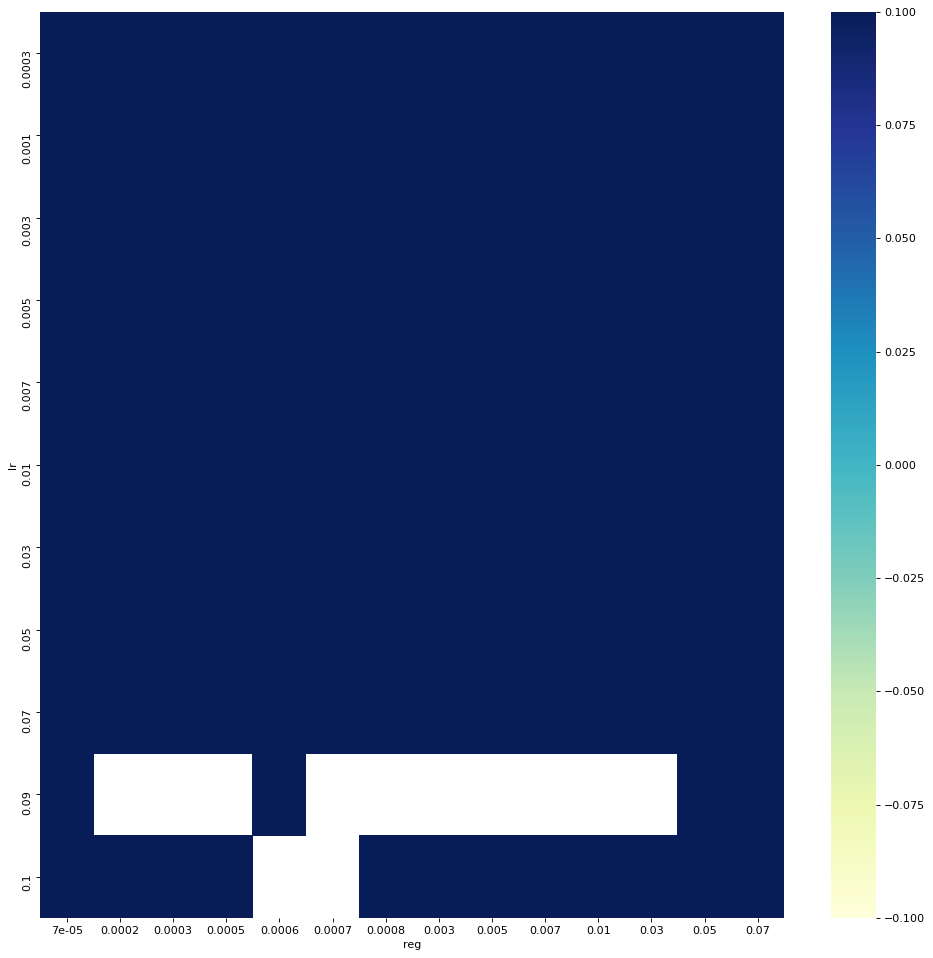

In [43]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
heatmap1_data = pd.pivot_table(results, values='result', 
                     index=['lr'], 
                     columns='reg')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [51]:
results[results.lr == 0.03]

,lr,reg,result
80,0.03,0.01000,0.987401
81,0.03,0.00030,0.987446
82,0.03,0.00300,0.987430
83,0.03,0.03000,0.987410
84,0.03,0.03000,0.987410
85,0.03,0.00050,0.987445
86,0.03,0.00500,0.987419
87,0.03,0.05000,0.987529
88,0.03,0.00007,0.987448
89,0.03,0.00070,0.987444


In [52]:
lrs = [0.0003, 0.003, 0.03, 0.03, 0.005, 0.05, 0.5, 0.007]
regs = [0.01, 0.0003, 0.003, 0.03, 0.03, 0.0005, 0.005, 0.05, 0.0007, 0.007, 0.07,  0.0002]

In [53]:
results = pd.DataFrame()
for lr in lrs:
    for reg in regs:
        m = SVDModel(lr=lr, reg=reg)
        m.fit(train)
        y_pred = m.predict(test.user_id, test.item_id)
        m.rmse(test.rating, y_pred)
        results = results.append(
        
        {
            'lr' : lr,
            'reg' : reg,
            'result' : m.rmse(test.rating, y_pred)
            
            
        }, ignore_index=True
        
        
        )
        print(lr, reg)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.0003 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.003 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.09s/it]

0.03 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0007


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.08s/it]

0.03 0.007


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.08s/it]

0.03 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.05


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.11s/it]

0.03 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.03


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.11s/it]

0.005 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.03


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.10s/it]

0.05 0.03


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.10s/it]

0.05 0.0005


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.11s/it]

0.05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]<ipython-input-3-50e9c804d3f1>:27: RuntimeWarning: overflow encountered in multiply
  self.i_factors[i] = self.i_factors[i] + self.lr * (e * self.u_factors[u] - self.reg * self.i_factors[i])
<ipython-input-3-50e9c804d3f1>:26: RuntimeWarning: overflow encountered in multiply
  self.u_factors[u] = self.u_factors[u] + self.lr * (e * self.i_factors[i] - self.reg * self.u_factors[u])
<ipython-input-3-50e9c804d3f1>:26: RuntimeWarning: invalid value encountered in add
  self.u_factors[u] = self.u_factors[u] + self.lr * (e * self.i_factors[i] - self.reg * self.u_factors[u])
<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: overflow encountered in multiply
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])
<ipython-input-3-50e9c804d3f1>:24: RuntimeWarning: invalid value encountered in double_scalars
  self.u_bias[u] = self.u_bias[u] + self.lr * (e - self.reg * sel

0.05 0.0002


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.06s/it]

0.5 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0005


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.02s/it]

0.5 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: overflow encountered in double_scalars
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])


0.5 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.0002


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.13s/it]

0.007 0.0003


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.08s/it]

0.007 0.003


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.09s/it]

0.007 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.0005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.05


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.10s/it]

0.007 0.0007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.07


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]

0.007 0.0002


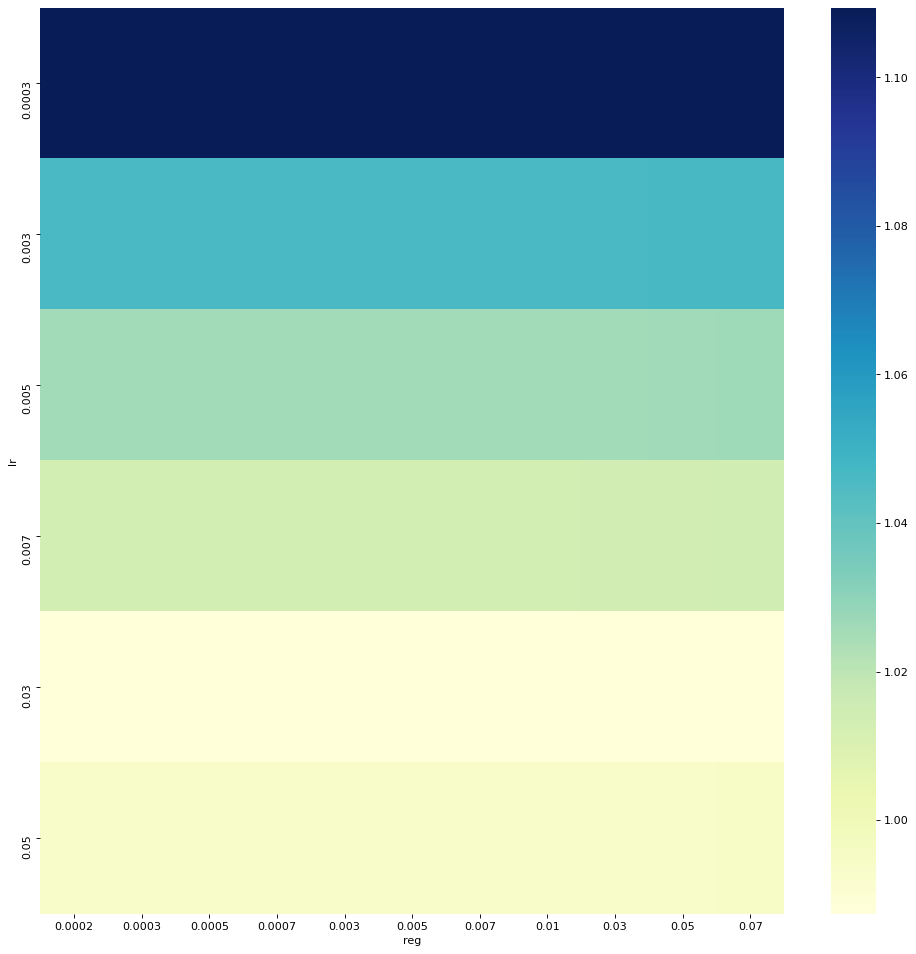

In [54]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
heatmap1_data = pd.pivot_table(results, values='result', 
                     index=['lr'], 
                     columns='reg')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [55]:
lrs = [0.03, 0.03, 0.005, 0.05, 0.5, 0.007]
regs = [0.01, 0.003, 0.03, 0.03, 0.005, 0.05, 0.007, 0.07]

In [56]:
results = pd.DataFrame()
for lr in lrs:
    for reg in regs:
        m = SVDModel(lr=lr, reg=reg)
        m.fit(train)
        y_pred = m.predict(test.user_id, test.item_id)
        m.rmse(test.rating, y_pred)
        results = results.append(
        
        {
            'lr' : lr,
            'reg' : reg,
            'result' : m.rmse(test.rating, y_pred)
            
            
        }, ignore_index=True
        
        
        )
        print(lr, reg)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.005 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]<ipython-input-3-50e9c804d3f1>:27: RuntimeWarning: overflow encountered in multiply
  self.i_factors[i] = self.i_factors[i] + self.lr * (e * self.u_factors[u] - self.reg * self.i_factors[i])
<ipython-input-3-50e9c804d3f1>:26: RuntimeWarning: overflow encountered in multiply
  self.u_factors[u] = self.u_factors[u] + self.lr * (e * self.i_factors[i] - self.reg * self.u_factors[u])
<ipython-input-3-50e9c804d3f1>:26: RuntimeWarning: invalid value encountered in add
  self.u_factors[u] = self.u_factors[u] + self.lr * (e * self.i_factors[i] - self.reg * self.u_factors[u])
<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: overflow encountered in multiply
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])
<ipython-input-3-50e9c804d3f1>:24: RuntimeWarning: invalid value encountered in double_scalars
  self.u_bias[u] = self.u_bias[u] + self.lr * (e - self.reg * sel

0.05 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.05s/it]

0.5 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: overflow encountered in double_scalars
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])


0.5 0.007


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.07


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.003


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.005


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.007 0.007


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.09s/it]

0.007 0.07


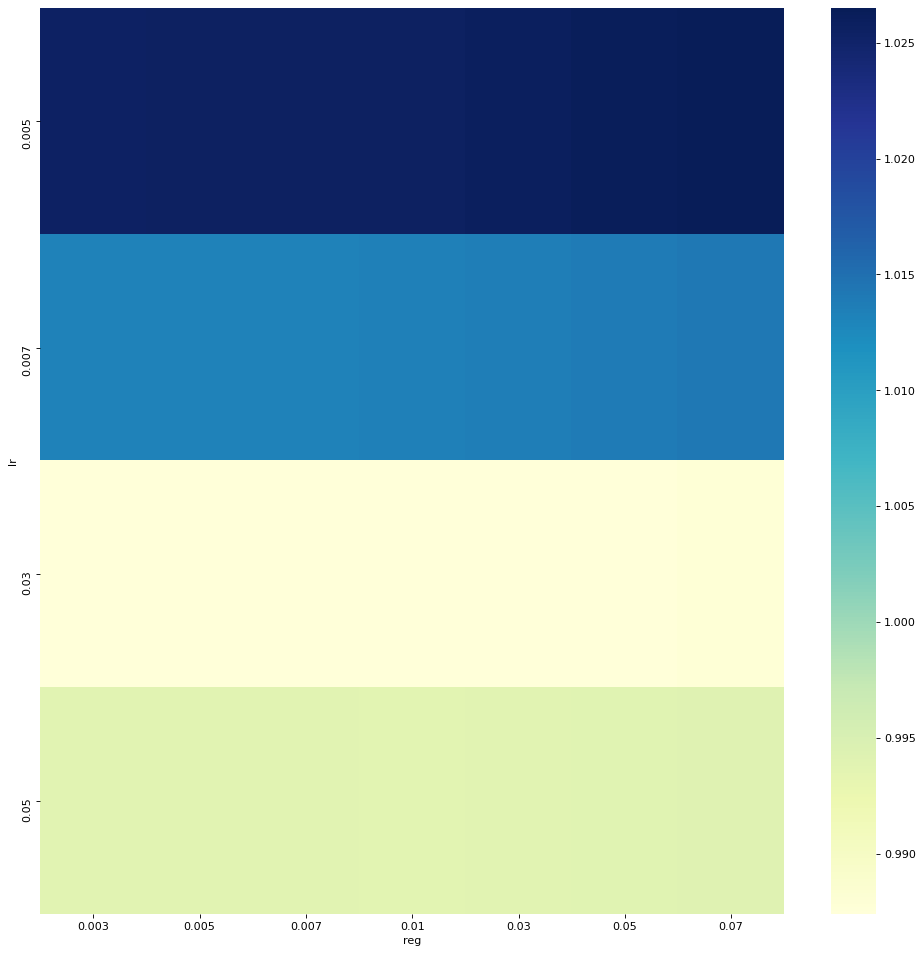

In [57]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
heatmap1_data = pd.pivot_table(results, values='result', 
                     index=['lr'], 
                     columns='reg')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [58]:
lrs = [0.03, 0.03, 0.05, 0.5]
regs = [0.01, 0.03, 0.03, 0.05]

In [59]:
results = pd.DataFrame()
for lr in lrs:
    for reg in regs:
        m = SVDModel(lr=lr, reg=reg)
        m.fit(train)
        y_pred = m.predict(test.user_id, test.item_id)
        m.rmse(test.rating, y_pred)
        results = results.append(
        
        {
            'lr' : lr,
            'reg' : reg,
            'result' : m.rmse(test.rating, y_pred)
            
            
        }, ignore_index=True
        
        
        )
        print(lr, reg)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.03 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.05 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]<ipython-input-3-50e9c804d3f1>:27: RuntimeWarning: overflow encountered in multiply
  self.i_factors[i] = self.i_factors[i] + self.lr * (e * self.u_factors[u] - self.reg * self.i_factors[i])
<ipython-input-3-50e9c804d3f1>:26: RuntimeWarning: overflow encountered in multiply
  self.u_factors[u] = self.u_factors[u] + self.lr * (e * self.i_factors[i] - self.reg * self.u_factors[u])
<ipython-input-3-50e9c804d3f1>:26: RuntimeWarning: invalid value encountered in add
  self.u_factors[u] = self.u_factors[u] + self.lr * (e * self.i_factors[i] - self.reg * self.u_factors[u])
<ipython-input-3-50e9c804d3f1>:33: RuntimeWarning: overflow encountered in multiply
  est += sum(self.u_factors[user_id] * self.i_factors[item_id])
<ipython-input-3-50e9c804d3f1>:24: RuntimeWarning: invalid value encountered in double_scalars
  self.u_bias[u] = self.u_bias[u] + self.lr * (e - self.reg * sel

0.05 0.05


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.01


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.03


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

0.5 0.03


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]

0.5 0.05


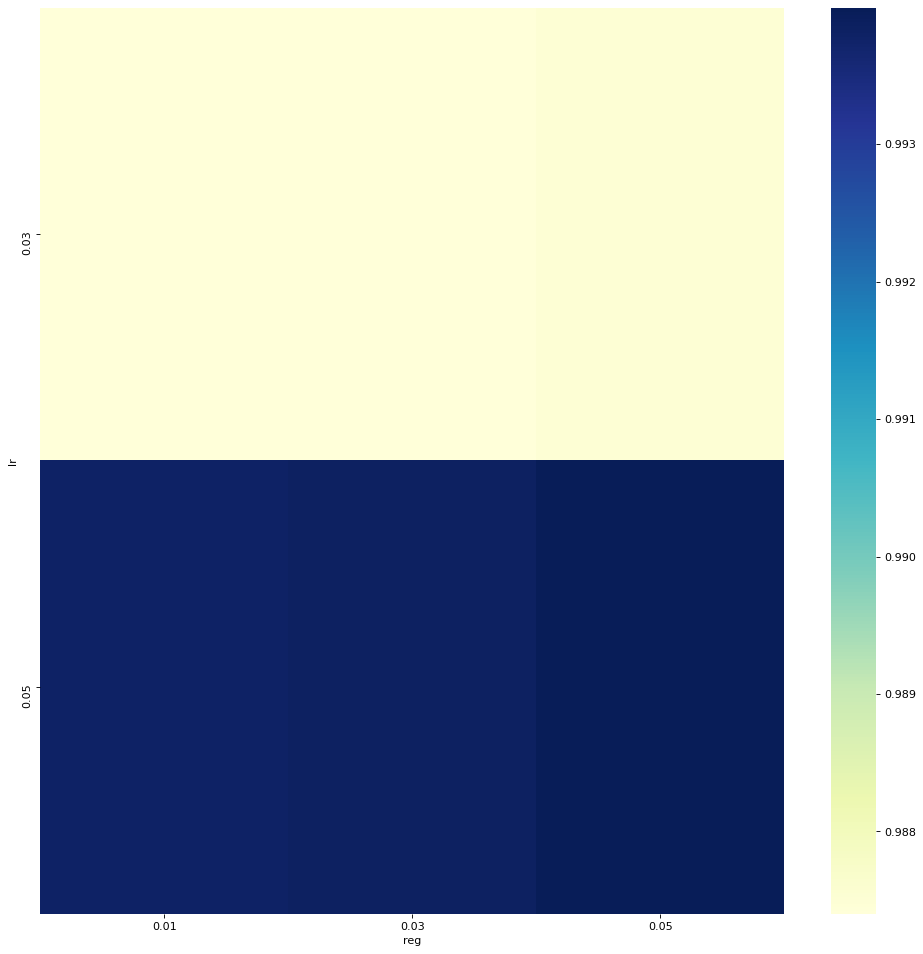

In [60]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
heatmap1_data = pd.pivot_table(results, values='result', 
                     index=['lr'], 
                     columns='reg')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [61]:
lrs = [0.03]
regs = [0.01]

In [62]:
results = pd.DataFrame()
for lr in lrs:
    for reg in regs:
        m = SVDModel(lr=lr, reg=reg)
        m.fit(train)
        y_pred = m.predict(test.user_id, test.item_id)
        m.rmse(test.rating, y_pred)
        results = results.append(
        
        {
            'lr' : lr,
            'reg' : reg,
            'result' : m.rmse(test.rating, y_pred)
            
            
        }, ignore_index=True
        
        
        )
        print(lr, reg)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.97s/it]

0.03 0.01


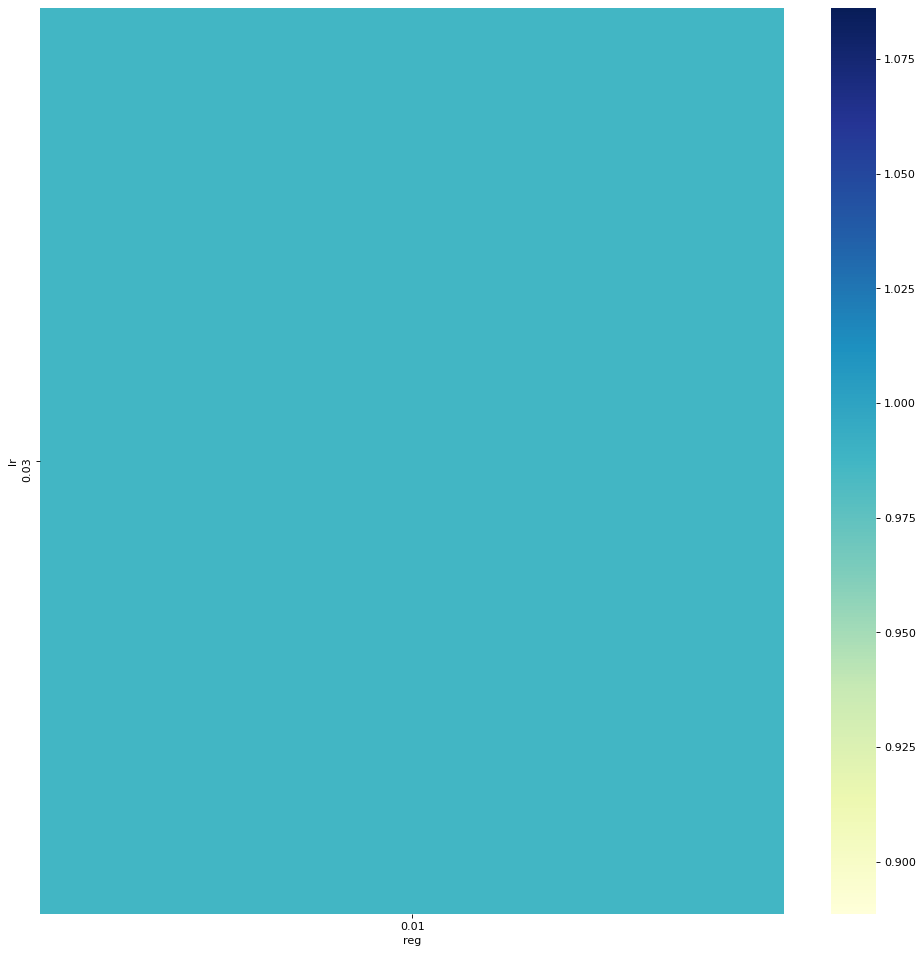

In [63]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
heatmap1_data = pd.pivot_table(results, values='result', 
                     index=['lr'], 
                     columns='reg')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

we have minimum with lr=0.03 and reg=0.01